# Example Conversion between a NonLinear Limb Darkening Law from Batman and a Starry Linear Limb Darkening Law

Import the necessary packages

In [1]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from copy import deepcopy

In [2]:
def nonlin(mu,c):
    return 1. - c[0] * (1. - mu**0.5) - c[1] * (1. - mu) - c[2] * (1. - mu**(1.5)) - c[3] * (1. - mu**2)

In [3]:
def ld_poly(mu,c):
    x = 1. - mu
    poly = Polynomial(c)
    #print(poly.coef)
    return poly(x)

In [4]:
degree=6

In [5]:
mu_arr = np.linspace(0.0,1,1024)

Look up the limb darkening coefficients from a calculator

https://exoctk.stsci.edu/limb_darkening

Here, these are for the F210M filter at 2.1 $\mu$m

In [6]:
carray = [0.559,0.007,-0.336,0.176]
intens = nonlin(mu_arr,carray)

In [7]:
u_fit = Polynomial.fit(1. - mu_arr,intens,degree,window=[0,1])
u_fit

Polynomial([ 9.96964410e-01,  1.74782908e-02, -1.79268765e+00,  8.12109503e+00,
       -1.75855590e+01,  1.76138304e+01, -6.73770442e+00], domain=[0., 1.], window=[0., 1.])

In [8]:
use_coeff = u_fit.coef / u_fit.coef[0]
coeff_for_starry = -1. * use_coeff[1:]
coeff_for_starry

array([-1.75315093e-02,  1.79814608e+00, -8.14582240e+00,  1.76391041e+01,
       -1.76674616e+01,  6.75821960e+00])

## Plot the intensity profile and the residuals

Text(0, 0.5, 'I/I(0)')

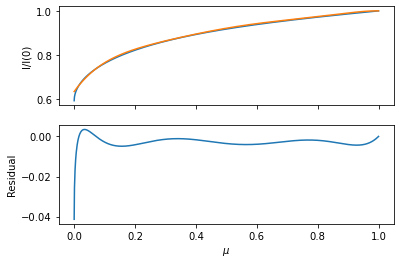

In [9]:
fig, (ax,ax2) = plt.subplots(2,sharex=True)
ax.plot(mu_arr,intens)
#plt.plot(mu_arr,u_fit(1. - mu_arr))
y_poly = ld_poly(mu_arr,use_coeff)
ax.plot(mu_arr,y_poly)
ax2.plot(mu_arr,intens - y_poly)
ax2.set_xlabel("$\mu$")
ax2.set_ylabel("Residual")
ax.set_ylabel("I/I(0)")

## Varying the First Coefficient as a Free Parameters

What if you just faried the first coefficient as a free parameter

How might the limb darkening curves look? Will they be non-physical?

Text(0, 0.5, 'I/I(0)')

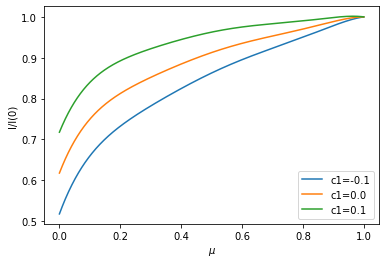

In [10]:
fig, ax = plt.subplots()
for lin_coeff in [-0.1,0.0,0.1]:
    new_arr = deepcopy(use_coeff)
    new_arr[1] = lin_coeff
    plt.plot(mu_arr,ld_poly(mu_arr,new_arr),label='c1={}'.format(lin_coeff))
plt.legend()
ax.set_xlabel("$\mu$")
ax.set_ylabel("I/I(0)")